In [49]:
import komm
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

In [ ]:
# Parameters
n_ofdm = 64
n_cp = 16
n_seq = 1000
n_symbols = n_seq * n_ofdm
M_psk = 2
SNR = np.arange(31)  # 0 to 30

s = np.random.randint(0, 2, size=n_symbols)

# Modulation
mod = komm.PSKModulation(M_psk)
s_mod = mod.modulate(s)

# Serial to Parallel conversion
s_paralel = s_mod.reshape(n_ofdm, n_seq)

s_ifft = ifft(s_paralel, axis=0)  # Added axis=0 to match MATLAB's behavior

# Add Cyclic Prefix
s_ofdm = np.vstack((s_ifft[-n_cp:], s_ifft))

tx = s_ofdm.reshape(-1)

# Initialize BER storage
ratio = np.zeros(len(SNR))
for i in range(len(SNR)):
    snr_lin = 10 ** (SNR[i] / 10)  # Convert SNR to linear scale
    awgn = komm.AWGNChannel(snr=snr_lin, signal_power="measured")
    y_channel = awgn(tx)

    rx = y_channel.reshape(n_ofdm + n_cp, n_seq)

    # Remove Cyclic Prefix
    rx_ofdm = rx[n_cp:, :]

    rx_fft = fft(rx_ofdm, axis=0)  # Added axis=0 to match MATLAB's behavior

    # Parallel to Serial conversion
    rx_sequential = rx_fft.reshape(-1)

    # Demodulation
    s_hat = mod.demodulate(rx_sequential)

    ratio[i] = np.mean(s != s_hat)

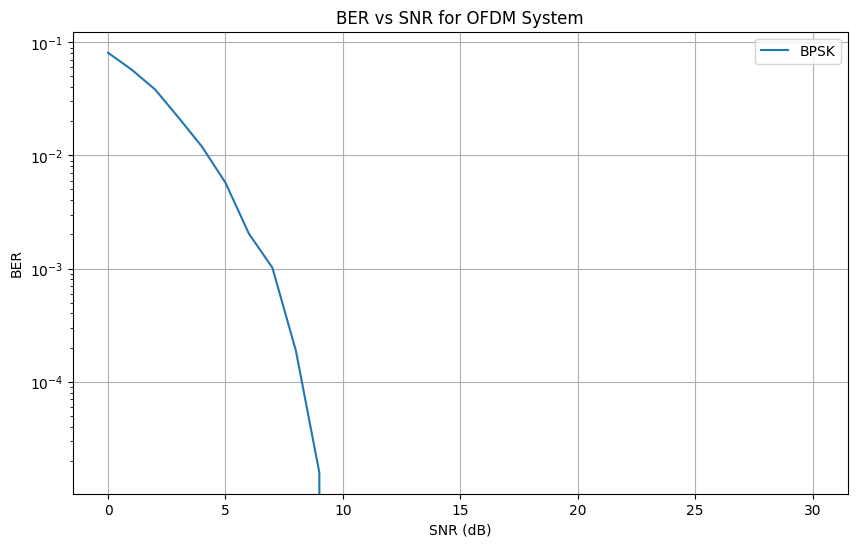

In [48]:
plt.figure(figsize=(10, 6))
plt.semilogy(SNR, ratio, label="BPSK")
plt.grid(True)
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.title("BER vs SNR for OFDM System")
plt.legend()
plt.show()